# <span style="color:blue"> SLACK - BOT</span>
## Análisis de emojis

In [1]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('files/slack_historial_de_mensajes_polarizados.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'level_0', 'Unnamed: 0.1', 'index', 'Unnamed: 0.1.1',
       'client_msg_id', 'type', 'text', 'ts', 'team', 'blocks', 'bot_id',
       'bot_profile', 'files', 'upload', 'display_as_bot', 'thread_ts',
       'reply_count', 'reply_users_count', 'latest_reply', 'reply_users',
       'subscribed', 'reactions', 'subtype', 'inviter', 'edited',
       'attachments', 'Channel_id', 'Channel_name', 'bot_link', 'purpose',
       'user_hash', 'datetime', 'date', 'time', 'h', 'm', 's', 'translations',
       'polarity', 'subjectivity'],
      dtype='object')

In [4]:
df.shape

(378, 41)

In [5]:
df = df.dropna(subset=['reactions'])

In [6]:
df['reactions'].count()

21

In [8]:
df['index'] = df.index

## Obtención de reacciones

In [9]:
df_reactions= pd.DataFrame({'channel_name':[],
                            'message_date':[],
                            'name': [], 
                            'counts': []})
df_reactions

,channel_name,message_date,name,counts


In [10]:
for i, message in df.iterrows():
    # guardo el nombre del canal
    channel_name = message['Channel_name']
    message_date = message['date']
    
    # paso las reacciones a formato lista en vez de string
    reactions = message['reactions'].replace("'", "\"")
    reactions_list = json.loads(reactions)
    
    for reaction in reactions_list:
        # guardo la reacción y el conteo
        name= reaction['name']
        counts= reaction['count']
        df_reactions.loc[i]=[channel_name,message_date,name,counts]

df_reactions.to_csv('tables/reacciones_lista_completa.csv', sep=',')        
df_reactions

,channel_name,message_date,name,counts
118,dailys,2020-10-15,smile,1.0
134,dailys,2020-10-14,joy,1.0
150,dailys,2020-10-14,+1,1.0
180,dailys,2020-10-06,+1,1.0
199,novedades,2020-10-27,+1,1.0
202,novedades,2020-10-27,smile,1.0
208,novedades,2020-10-19,+1,1.0
210,novedades,2020-10-16,+1,1.0
240,test,2020-10-26,+1,2.0
250,test,2020-10-21,+1,1.0


In [11]:
df_reactions['message_date'] = pd.to_datetime(df_reactions['message_date'])

In [12]:
df_reactions.dtypes

channel_name            object
message_date    datetime64[ns]
name                    object
counts                 float64
dtype: object

## Análisis de reacciones
### Conteos

In [13]:
# Tabla de contingencia

print('CONTEO DE REACCIONES POR CANAL')

crostab_1= pd.crosstab(index=df_reactions['channel_name'],
            columns=df_reactions['name'], margins=True)

crostab_1.to_csv('tables/reacciones_crostab_1.csv', sep=',')  
crostab_1

CONTEO DE REACCIONES POR CANAL


name,+1,clap,grinning,heart,joy,raised_hands,smile,tada,All
channel_name,,,,,,,,,
dailys,2,0,0,0,1,0,1,0,4
general,3,0,0,0,0,0,0,0,3
novedades,3,0,0,0,0,0,1,0,4
test,4,1,1,1,0,1,1,1,10
All,12,1,1,1,1,1,3,1,21


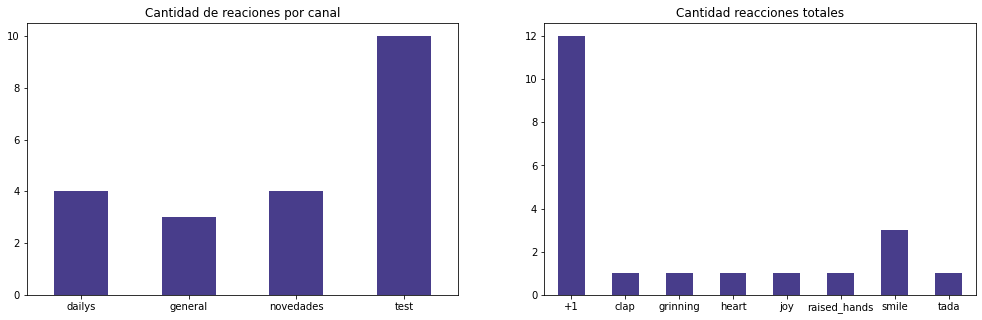

In [14]:
plt.figure (figsize=(17,5))

plt.subplot(121)
df_reactions.groupby('channel_name').count()['counts'].plot(kind='bar', color='darkslateblue')
plt.title('Cantidad de reaciones por canal')
plt.xticks(rotation=0)
plt.xlabel('')

plt.subplot(122)
df_reactions.groupby('name').count()['counts'].plot(kind='bar', color='darkslateblue')
plt.title('Cantidad reacciones totales')
plt.xticks(rotation=0)
plt.xlabel('')

plt.savefig('figures/reacciones_conteos.jpg')

<Figure size 1440x720 with 0 Axes>

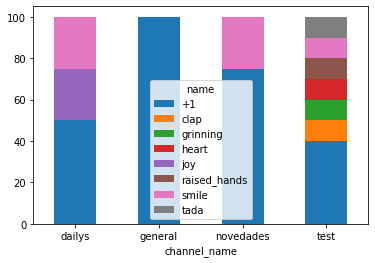

In [15]:
plt.figure(figsize=(20,10))
plot = pd.crosstab(index=df_reactions['channel_name'],
                  columns=df_reactions['name']).apply(lambda r: r/r.sum()*100,axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)

plt.savefig('figures/reacciones_proporcion_por_canal.jpg')

### Porcentajes

In [16]:
# tabla de contingencia en porcentajes relativos total

print('PORCENTAJE DE REACCIONES POR CANAL')

crostab_2 = pd.crosstab(index=df_reactions['channel_name'], 
            columns=df_reactions['name'],margins=True).apply(lambda r: r/len(df_reactions) *100, axis=1).round()

crostab_2.to_csv('tables/reacciones_crostab_2_porcentajes.csv', sep=',')  
crostab_2

PORCENTAJE DE REACCIONES POR CANAL


name,+1,clap,grinning,heart,joy,raised_hands,smile,tada,All
channel_name,,,,,,,,,
dailys,10.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,19.0
general,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
novedades,14.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,19.0
test,19.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,48.0
All,57.0,5.0,5.0,5.0,5.0,5.0,14.0,5.0,100.0


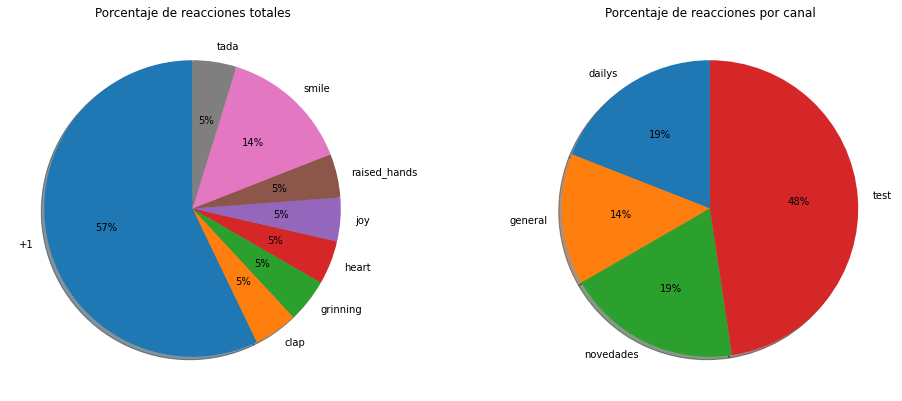

In [17]:
plt.figure (figsize=(17,15))

plt.subplot(223)
df_reactions.groupby('name').count()['counts'].plot(kind='pie',
                                                    autopct='%1.0f%%',
                                                    shadow=True, 
                                                    startangle=90)
plt.title('Porcentaje de reacciones totales')
plt.xlabel('')
plt.ylabel('')

plt.subplot(224)
df_reactions.groupby('channel_name').count()['counts'].plot(kind='pie',
                                                            autopct='%1.0f%%',
                                                            shadow=True, 
                                                            startangle=90)
plt.title('Porcentaje de reacciones por canal')
plt.xlabel('')
plt.ylabel('')

plt.savefig('figures/reacciones_grafico_circular.jpg')

In [18]:
df_reactions.set_index('message_date', inplace=True)

In [19]:
df_sub= df_reactions['counts']

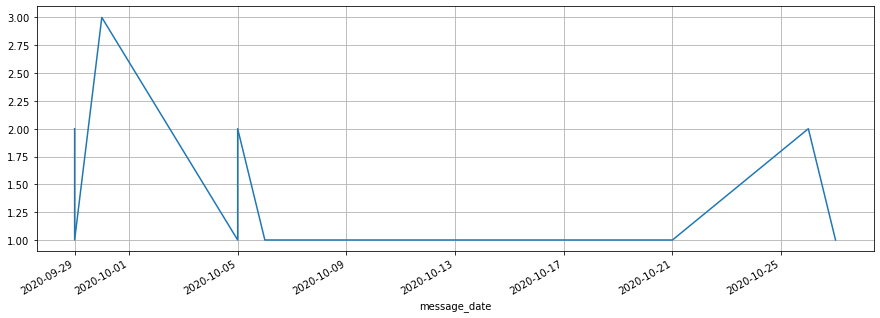

In [20]:
# Ahora que la variable 'datetime' se reconoce como una serie de tiempo, es momento de visualizar nuestros datos
df_sub.plot(grid=True, figsize=(15,5))

plt.savefig('figures/reacciones_serie_de_tiempo.jpg')